In [1]:
import os
os.chdir('drive/MyDrive/Nalaiya Thiran')

# 1.Download dataset
# 2.Load dataset

In [130]:
import pandas as pd
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 3.Perform Below Visualizations

1.   Univariate Analysis
2.   Bi-Variate Analysis
3.   Multi-variate Analysis

Text(0.5, 1.0, 'Univariate')

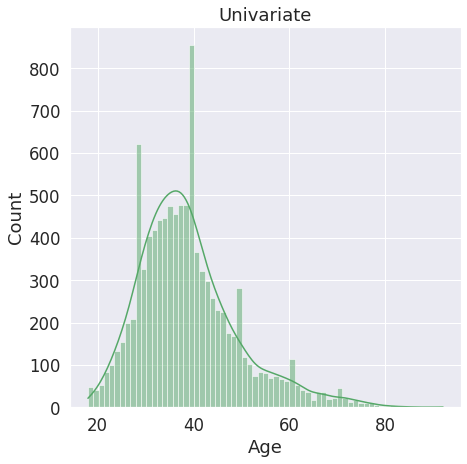

In [35]:
#univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt
#myplt = plt.hist(data["Age"])
sns.histplot(data["Age"],kde=True,color='g')
plt.title("Univariate")

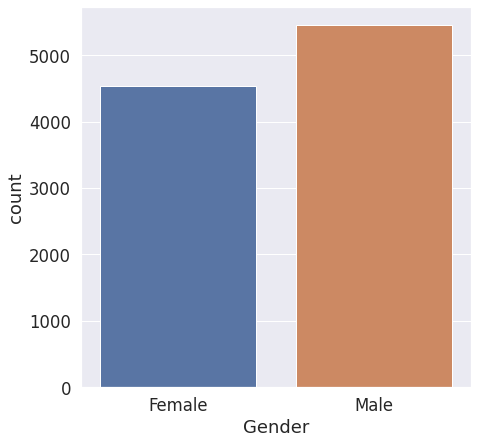

In [42]:
#bivariate analysis 1
sns.countplot(x='Gender', data = data)

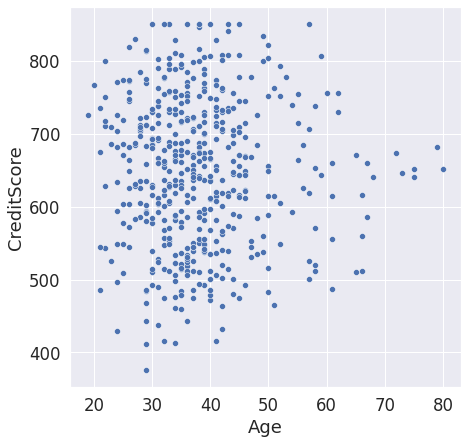

In [54]:
#bivariate analysis 2
df = data.head(500)
sns.scatterplot(x='Age',y='CreditScore', data=df)

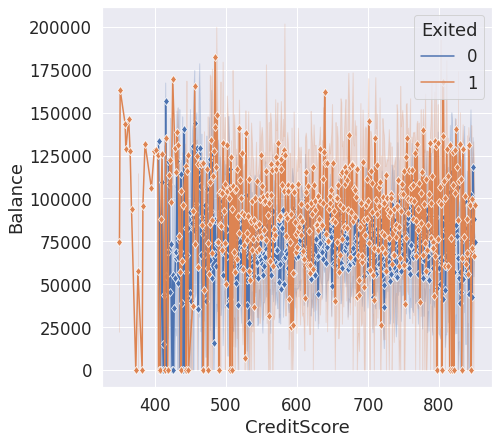

In [ ]:
#multivariate analysis 
sns.set(rc={'figure.figsize':(7,7)}) 
sns.set(font_scale=1.5) 
fig=sns.lineplot(x=data['CreditScore'], y=data['Balance'] ,markevery=1,marker='d' ,data=data, hue=data['Exited'] ) 

#4.Perform descriptive statistics on the dataset.

In [6]:
numeric_columns = data[['CreditScore', 'Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', "EstimatedSalary","Exited"]]
print("Numerical Data Descriptive Statistics")
numeric_columns.describe(include = 'all')

Numerical Data Descriptive Statistics


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print("String Columns Description")
data.describe(include=['object'])

String Columns Description


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


#5.Handle the Missing values

In [57]:
data.isnull().sum().sum()

0

In [56]:
data['Tenure'].isna().sum()

0

####Since no null values are present the null values need not be handled

#6.Find the outliers and replace the outliers



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


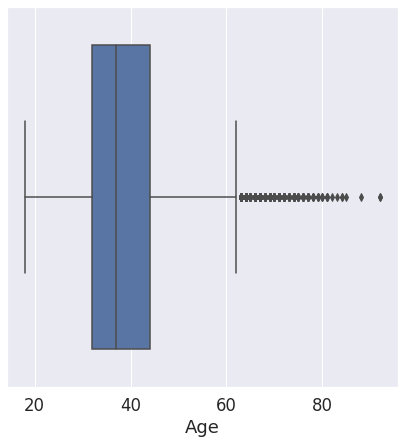

In [115]:
#use only the required column
df2 = pd.DataFrame(data['Age'],columns = ['Age'])
sns.boxplot(df2.Age,data = data)

In [104]:
df2

,Age
0,42
1,41
2,42
3,39
4,43
...,...
9995,39
9996,35
9997,36
9998,42


In [117]:
#upper_extreme = q3+1.5*IQR
#lower_extreme = q1-1.5*IQR
#IQR = q3-q1

qnt = df2.quantile(q=[0.25,0.75])
qnt

,Age
0.25,32.0
0.75,44.0


In [106]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
upper_extreme = qnt.loc[0.75]+1.5*IQR
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme

Age    14.0
dtype: float64

In [84]:
upper_extreme
#now we got the upper extreme which is the outlier so replace it now

Age    62.0
dtype: float64

In [191]:
med = df2['Age'].median()
med

37.0

In [185]:
upper_extreme

Age    62.0
dtype: float64

In [195]:
#treating outliers using capping
#here 14 is lower_extreme
#62 is upper_extreme
import numpy as np

print(df2['Age'])
df2["New_Age"] = df2["Age"].map(
    lambda x: med
    if x < 14 else x)
df2["New_Age"] = df2['Age'].map(lambda x:med
                                if x > 62 else x)
df2

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64


,Age,New_Age
0,42,42.0
1,41,41.0
2,42,42.0
3,39,39.0
4,43,43.0
...,...,...
9995,39,39.0
9996,35,35.0
9997,36,36.0
9998,42,42.0


#7.Check for categorical columns and perform encoding

In [125]:
#extracting categorical columns
print(data['Geography'].unique())
print(data['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [122]:
data2 = data.copy()
data2['Gender'].replace(['Female','Male'],[0,1],inplace=True)
data2['Geography'].replace(['France','Spain','Germany'],[0,1,2],inplace=True)
data2

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary
0,1,619,0,0,42,2,0.00,101348.88
1,2,608,1,0,41,1,83807.86,112542.58
2,3,502,0,0,42,8,159660.80,113931.57
3,4,699,0,0,39,1,0.00,93826.63
4,5,850,1,0,43,2,125510.82,79084.10
...,...,...,...,...,...,...,...,...
9995,9996,771,0,1,39,5,0.00,96270.64
9996,9997,516,0,1,35,10,57369.61,101699.77
9997,9998,709,0,0,36,7,0.00,42085.58
9998,9999,772,2,1,42,3,75075.31,92888.52


In [152]:
d2 = pd.get_dummies(data,columns = ['Geography','Gender'])
d2

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


#8.Split the data into dependent and independent variables.

In [138]:
col= data.iloc[:,:-1].columns
print(col)

#dependant variable
y = data.iloc[:,-1:].columns
print(y)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Index(['Exited'], dtype='object')


In [139]:
dep_data_var = data[col]
print(dep_data_var)

print(data[y])

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

#9.Scale the independent variables

(array([ 413., 1035., 1048., 1009., 2001.,    0., 1995.,    0., 1025.,
        1474.]),
 array([-1.73331549, -1.38753759, -1.04175968, -0.69598177, -0.35020386,
        -0.00442596,  0.34135195,  0.68712986,  1.03290776,  1.37868567,
         1.72446358]),
 <a list of 10 Patch objects>)

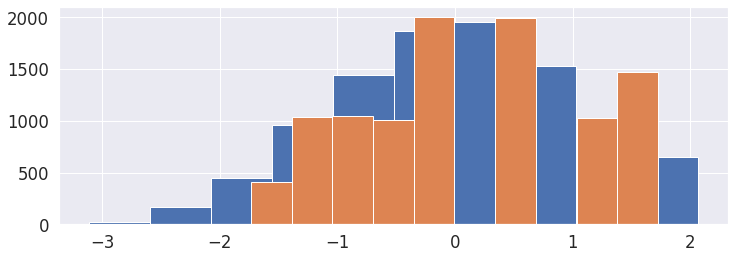

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(figsize=(12, 4))
cols = ['CreditScore','Tenure','EstimatedSalary']

scaler = StandardScaler()
x_std = scaler.fit_transform(data[cols])

ax.hist(x_std[:,0])
ax.hist(x_std[:,1])

#10.Split the data into training and testing

In [173]:
from sklearn.model_selection import train_test_split
x = data['Age'].values
print(x)
y = data.iloc[:,-1].values
print(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(X_train)
print("Total Training data ",len(X_train))

[42 41 42 ... 36 42 28]
[1 0 1 ... 1 1 0]
[29 37 49 ... 38 43 51]
Total Training data  6700
